<a href="https://colab.research.google.com/github/Irving67/CreaTuPropioChatBot_Riiaa2020/blob/master/ChatBot_Riia2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github.com/Irving67/CreaTuPropioChatBot_Riiaa2020/blob/master/notebooks/Trucos_Colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Irving67/CreaTuPropioChatBot_Riiaa2020/blob/master/notebooks/Trucos_Colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver fuente en GitHub</a>
  </td>
</table>

# Modelo conversacional de un ChatBot

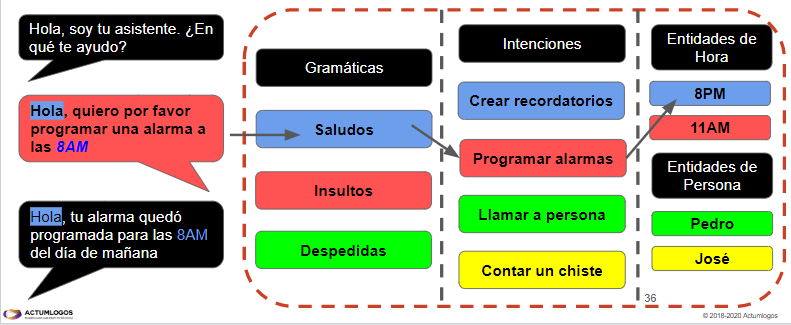

# Sección 01.- Autenticación en Googlr Drive, Declaración de librerías y Lectura de Utterances / Tags

In [ ]:
# Líneas necesarias para la autenticación del usuario en su cuenta de Google Colab
from google.colab import drive
drive.mount('/content/drive')

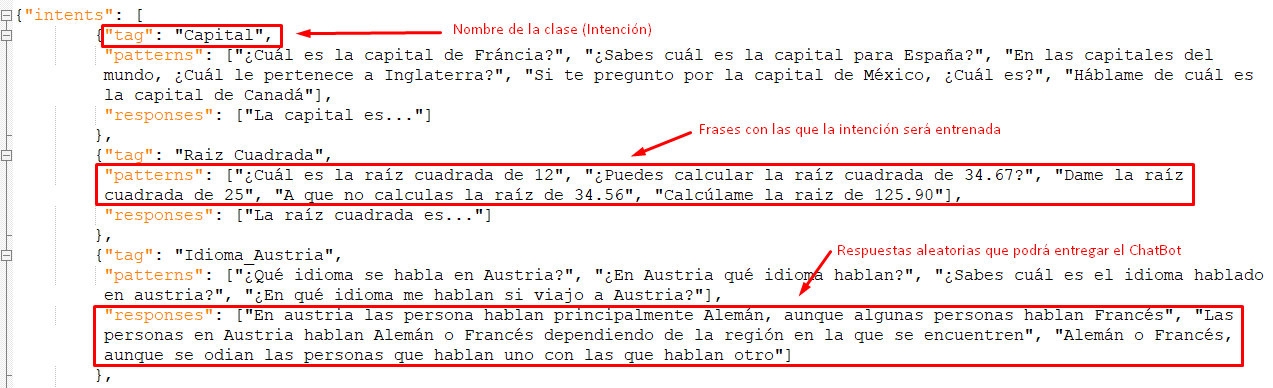

In [ ]:
# Declaración de librerías
import nltk
import numpy
import tensorflow
import random
import json

# Lectura de .json con los intents y las respuestas de cada clase
with open('/content/drive/My Drive/Intenciones.json', encoding='utf-8') as file:
    data = json.load(file)

labels = []
texts = []

# Recopilación de textos para cada clase 
for intent in data['intents']:
    for pattern in intent['patterns']:
        texts.append(pattern)   
        
    # Creamos una lista con los nombres de las clases
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
print(texts)

['¿Cuál es la capital de Fráncia?', '¿Sabes cuál es la capital para España?', 'En las capitales del mundo, ¿Cuál le pertenece a Inglaterra?', 'Si te pregunto por la capital de México, ¿Cuál es?', 'Háblame de cuál es la capital de Canadá', '¿Cuál es la raíz cuadrada de 12', '¿Puedes calcular la raíz cuadrada de 34.67?', 'Dame la raíz cuadrada de 25', 'A que no calculas la raíz de 34.56', 'Calcúlame la raiz de 125.90', '¿Qué idioma se habla en Austria?', '¿En Austria qué idioma hablan?', '¿Sabes cuál es el idioma hablado en austria?', '¿En qué idioma me hablan si viajo a Austria?', '¿Cuál es el animal más grande del mundo?', 'Sabes cuál es el animal más grande en el mundo?', '¿En todo el mundo cuál es el animál más grande?', 'Dime cuál animal es más grande en todo el planeta', '¿Qué significa ADN?', '¿Qué significan las siglas de ADN?', '¿Las siglas de AND para qué son utilizadas?', '¿Me puedes decir qué significa ADN?', '¿Cómo te llamas?', '¿Cuál es tu nombre?', '¿Cómo te puedo llamar?'

# Sección 02.- Generación de vector de Salidas a partir de tags

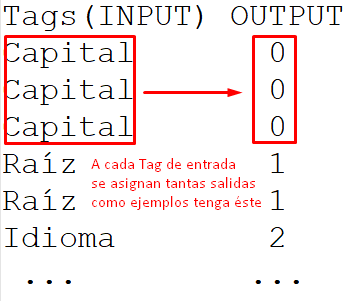

In [ ]:
# Generamos el vector de respuestas 
# (Cada clase tiene una salida numérica asociada)
output = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        # El identificador de la clase es su índice
        # en la lista de clases o labels
        output.append(labels.index(intent['tag']))
    
print("Vector de salidas Y:")
print(output)

# Declaramos librería para convertir el vector de salida en una 
# matriz categórica
from keras.utils.np_utils import to_categorical 

# Generamos la matriz de salidas
train_labels = to_categorical(output, num_classes=len(labels))
print('Matriz de salidas')
print(train_labels)

Vector de salidas Y:
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Matriz de salidas
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]


Using TensorFlow backend.


# Sección 03.- Filtrado de StopWords y preprocesamiento de la información

In [ ]:
# Importamos librerías para el filtrado de StopWords y tokenicación
import nltk
# Si Colab marca un error en la línea 13, deberás de ejecutar la siguiente línea
# y realizar la instalación de "nltk-allpackages" 
#nltk.download()

from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import re

stop_words = stopwords.words('spanish')

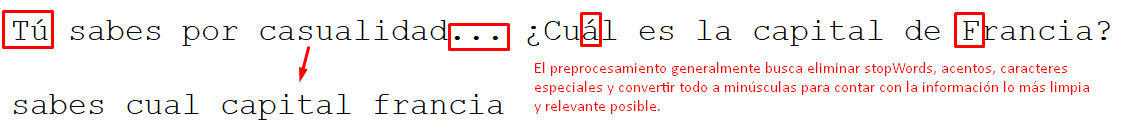

In [ ]:
# Para cada enunciado quitamos las StopWords
# También quitamos los acentos y filtramos signos de puntuación
X = []
for sen in texts:
    
    sentence = sen
    # Filtrado de stopword
    for stopword in stop_words:
        sentence = sentence.replace(" " + stopword + " ", " ")
    sentence = sentence.replace("á", "a")
    sentence = sentence.replace("é", "e")
    sentence = sentence.replace("í", "i")
    sentence = sentence.replace("ó", "o")
    sentence = sentence.replace("ú", "u")
            
    # Remover espacios múltiples
    sentence = re.sub(r'\s+', ' ', sentence)
    # Convertir todo a minúsculas
    sentence = sentence.lower()
    # Filtrado de signos de puntuación
    tokenizer = RegexpTokenizer(r'\w+')
    # Tokenización del resultado
    result = tokenizer.tokenize(sentence)
    # Agregar al arreglo los textos "destokenizados" (Como texto nuevamente)
    X.append(TreebankWordDetokenizer().detokenize(result))

In [ ]:
# Imprimimos la lista de los enunciados que resultan
print(X)

['cual capital francia', 'sabes cual capital españa', 'en capitales mundo cual pertenece inglaterra', 'si pregunto capital mexico cual es', 'hablame cual capital canada', 'cual raiz cuadrada 12', 'puedes calcular raiz cuadrada 34 67', 'dame raiz cuadrada 25', 'a calculas raiz 34 56', 'calculame raiz 125 90', 'que idioma habla austria', 'en austria idioma hablan', 'sabes cual idioma hablado austria', 'en idioma hablan si viajo austria', 'cual animal grande mundo', 'sabes cual animal grande mundo', 'en mundo cual animal grande', 'dime cual animal grande planeta', 'que significa adn', 'que significan siglas adn', 'las siglas and utilizadas', 'me puedes decir significa adn', 'como llamas', 'cual nombre', 'como puedo llamar', 'con quien hablo', 'a nombre respondes', 'tienes algun nombre', 'como puedo llamar', 'como nombraron', 'cuantos paises europa', 'cuantos paises conforman union europea', 'con cuantos paises cuenta europa', 'cantidad paises europa', 'cantidad paises union europea', 'pai

# Sección 04.- Creación de matrices numéricas para las entradas + Padding

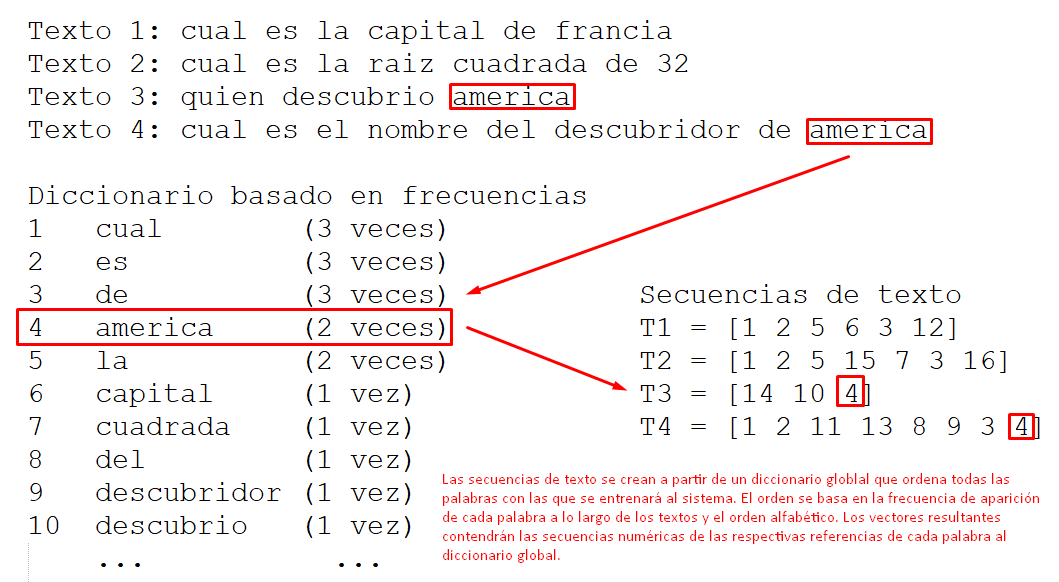

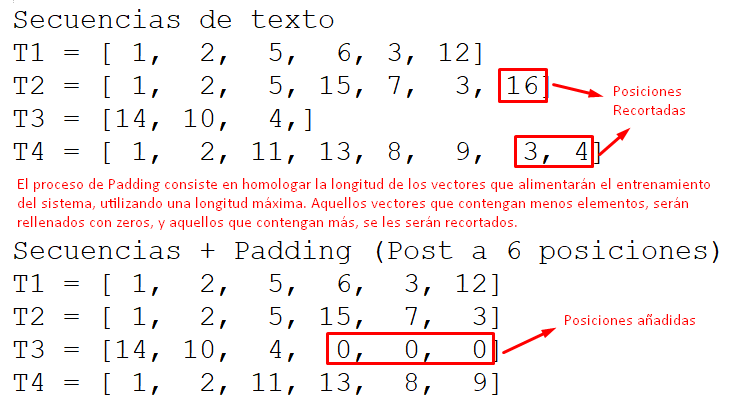

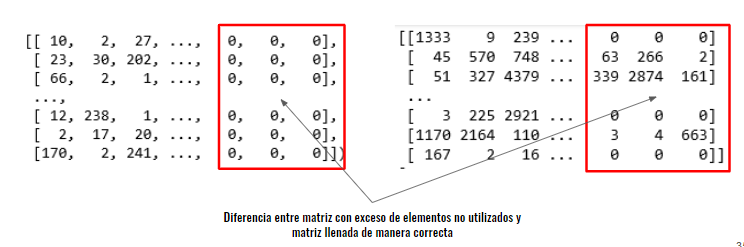

In [ ]:
# Importamos la librería para generar la matriz de entrada de textos
# (Importamos pad_sequences y texts_to_sequences para proceso de padding)
from keras.preprocessing.sequence import pad_sequences

# Cantidad de palabras máximas por vector de entrada
maxlen_user = 5

# Preparamos el "molde" para la crear los vectores de secuencia de palabras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Transforma cada texto en una secuencia de valores enteros
X_seq = tokenizer.texts_to_sequences(X)

# Especificamos la matriz (Con padding de posiciones iguales a maxlen)
X_train = pad_sequences(X_seq, padding='post', maxlen=maxlen_user)

print("Matriz de entrada:")
print(X_train)

Matriz de entrada:
[[ 1  5 36  0  0]
 [ 6  1  5 37  0]
 [38  8  1 39 40]
 [41  5 42  1 43]
 [23  1  5 44  0]
 [ 1  3 15 45  0]
 [46  3 15 25 47]
 [48  3 15 49  0]
 [16 50  3 25 51]
 [52  3 53 54  0]
 [17  9 55 10  0]
 [ 7 10  9 26  0]
 [ 6  1  9 56 10]
 [ 9 26 22 57 10]
 [ 1 11 12  8  0]
 [ 6  1 11 12  8]
 [ 7  8  1 11 12]
 [58  1 11 12 59]
 [17 27 18  0  0]
 [17 60 28 18  0]
 [61 28 62 63  0]
 [64 24 65 27 18]
 [13 66  0  0  0]
 [ 1 19  0  0  0]
 [13 29 30  0  0]
 [31 14 67  0  0]
 [16 19 68  0  0]
 [69 70 19  0  0]
 [13 29 30  0  0]
 [13 71  0  0  0]
 [20  2 21  0  0]
 [20  2 72 32 33]
 [31 20  2 73 21]
 [34  2 21  0  0]
 [34  2 32 33  0]
 [ 2 74  0  0  0]
 [14 75  4  0  0]
 [ 6 14 76  4  0]
 [16 14 77 35  4]
 [23 35  4  0  0]
 [78 79  4  0  0]]


# Sección 05.- Uso de Word Embeddings

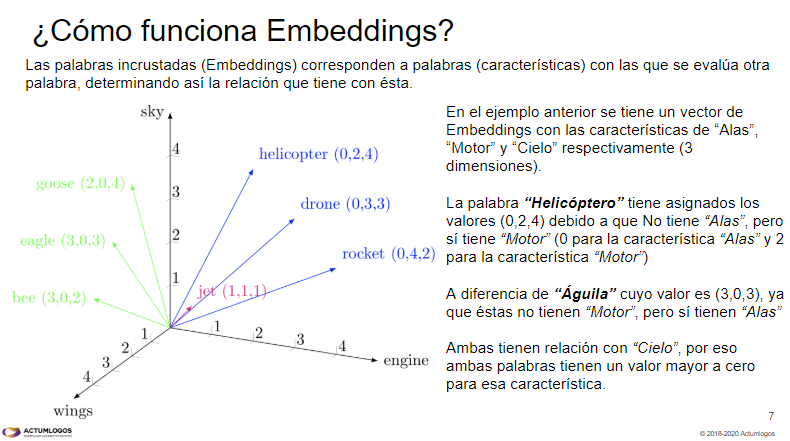

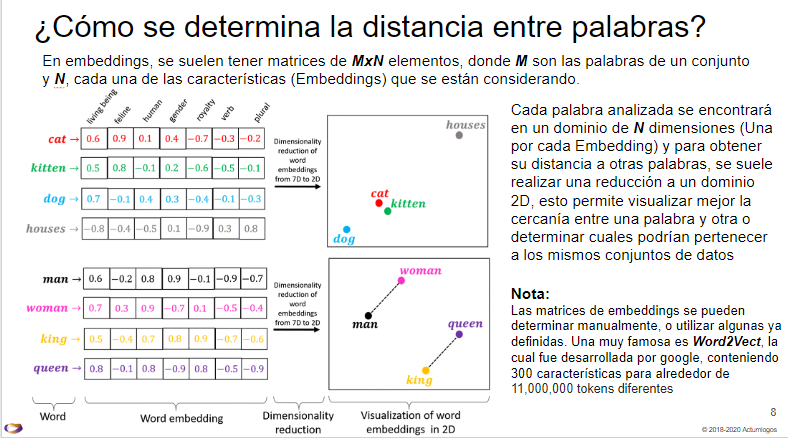

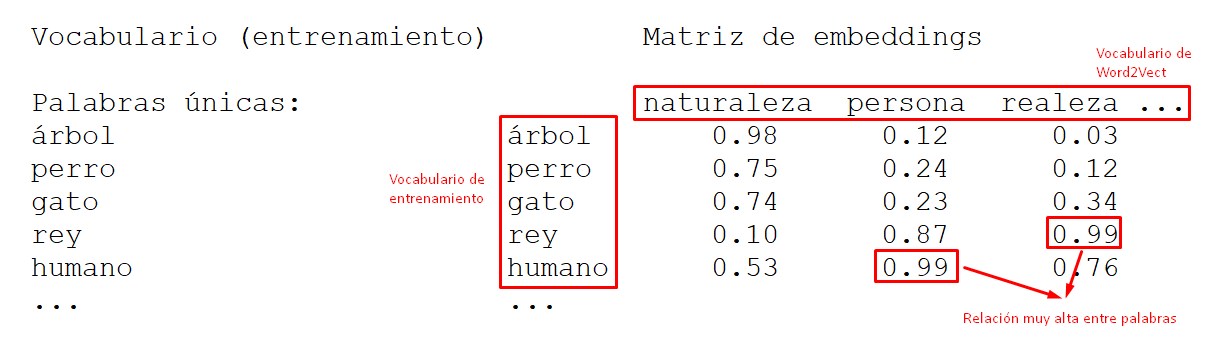

In [ ]:
# Declaración de librerías para manejo de arreglos (Numpy)
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings
embeddings_dictionary = dict()
Embeddings_file = open('/content/drive/My Drive/Word2Vect_Spanish.txt', encoding="utf8")

# Extraemos las características del archivo de embeddings
# y las agregamos a un diccionario (Cada elemento es un vextor)
for linea in Embeddings_file:
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary [palabra] = vector
Embeddings_file.close()

In [ ]:
# Extraemos la cantidad de palabras en el vocabulario
vocab_size = len(tokenizer.word_index) + 1

# Generamos la matriz de embeddings (Con 300 Características)
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    # Extraemos el vector de embedding para cada palabra
    embedding_vector = embeddings_dictionary.get(word)
    # Si la palbra si existía en el vocabulario
    # agregamos su vector de embeddings en la matriz
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Sección 6.- Arquitectura de Red Neuronal 

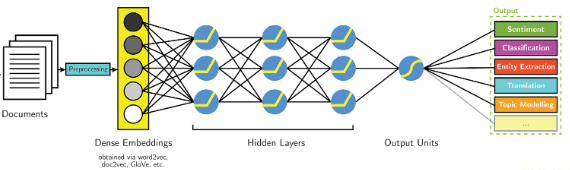

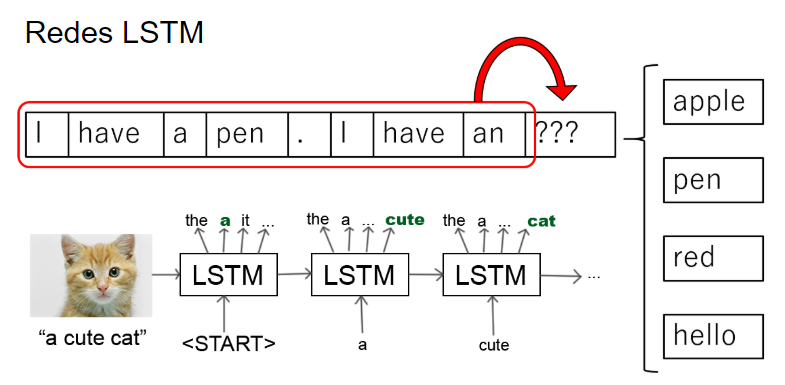

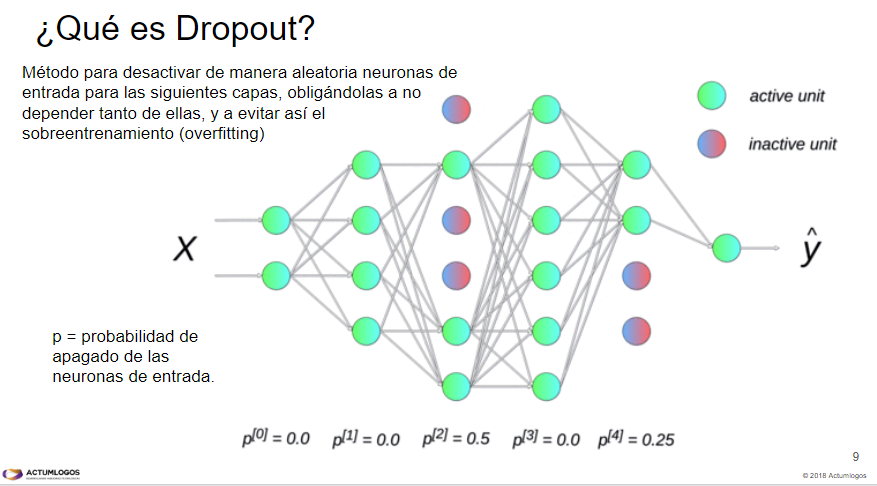

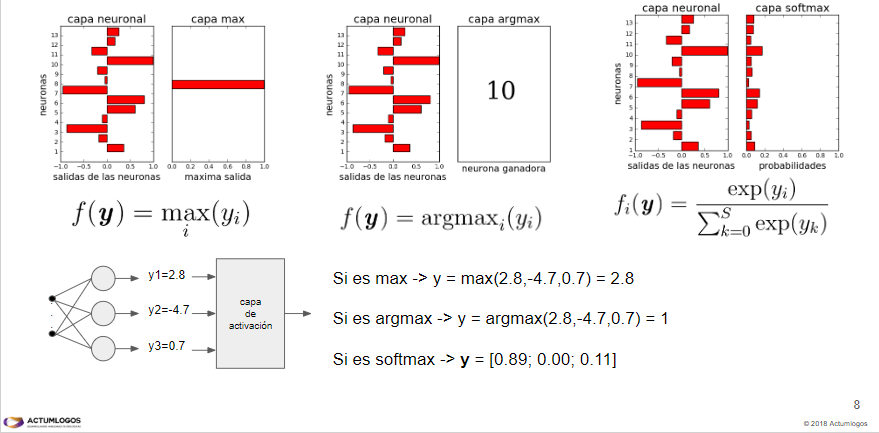

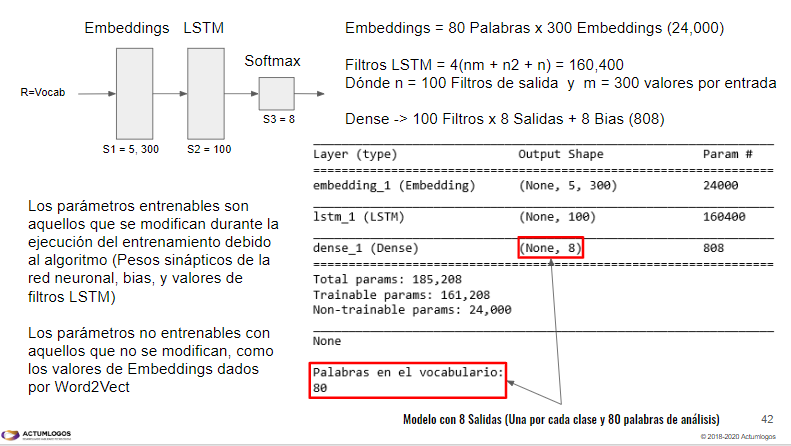

In [ ]:
# Declaración de modelo Secuencial 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

# Declaración de las capas del modelo LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=X_train.shape[1] , trainable=False)
model.add(embedding_layer)
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(labels), activation='softmax'))

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

print("\nPalabras en el vocabulario:")
print(vocab_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 300)            24000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
Total params: 185,208
Trainable params: 161,208
Non-trainable params: 24,000
_________________________________________________________________
None

Palabras en el vocabulario:
80


# Sección 7.- Entrenamiento de la red neuronal

In [ ]:
# Ajuste de los datos de entrenamiento al modelo creado
history = model.fit(X_train, train_labels, epochs=30, batch_size=8, verbose=1)

# Cálculo de los procentajes de Eficiencia y pérdida 
score = model.evaluate(X_train, train_labels, verbose=1)
print("\nTest Loss:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/30
41/41 [==============================] - 0s 11ms/step - loss: 2.0706 - accuracy: 0.2927
Epoch 2/30
41/41 [==============================] - 0s 913us/step - loss: 2.0131 - accuracy: 0.6341
Epoch 3/30
41/41 [==============================] - 0s 917us/step - loss: 1.9688 - accuracy: 0.6829
Epoch 4/30
41/41 [==============================] - 0s 875us/step - loss: 1.9098 - accuracy: 0.6585
Epoch 5/30
41/41 [==============================] - 0s 865us/step - loss: 1.8533 - accuracy: 0.6098
Epoch 6/30
41/41 [==============================] - 0s 866us/step - loss: 1.7483 - accuracy: 0.6098
Epoch 7/30
41/41 [==============================] - 0s 1ms/step - loss: 1.6413 - accuracy: 0.6829
Epoch 8/30
41/41 [==============================] - 0s 1ms/step - loss: 1.4961 - accuracy: 0.7317
Epoch 9/30
41/41 [==============================] - 0s 1ms/step - loss: 1.2953 - accuracy: 0.6585
Epoch 10/30
41/41 [==============================] - 0s 1ms/step - loss: 1.0807 - accuracy: 0.7805
Epoch 11

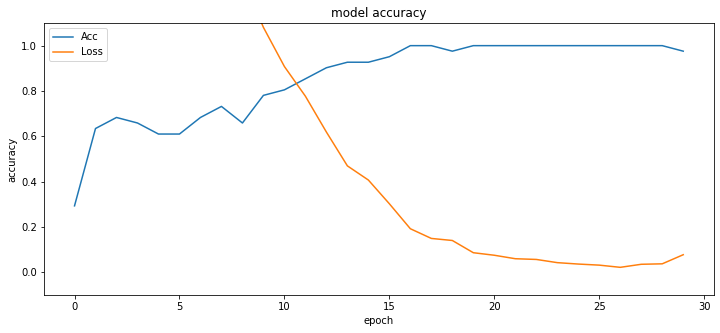

In [ ]:
# Finalmente imprimimos la eficiencia y la pérdida del modelo
# época a época para ver su evolución
import matplotlib.pyplot as plt

# Parámetros de ploteo para la gráfica
plt.figure(figsize=(12,5))
plt.ylim(-0.1, 1.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Acc','Loss'])
plt.show()

# Sección 8.- Prueba del modelo de Chatbot

## 8.1.- Instanciador

In [ ]:
# Módulo instanciador de entradas para el chatbot
# (Convierte el texto de entrada en la secuencia de
# valores enteros con pad_sequences, elimina signos
# de interrogación y acentos)
def Instancer(inp):  
    inp = inp.lower()
    inp = inp.replace("á", "a")
    inp = inp.replace("é", "e")
    inp = inp.replace("í", "i")
    inp = inp.replace("ó", "o")
    inp = inp.replace("ú", "u")
    inp = inp.replace("¿", "")
    inp = inp.replace("?", "")
    txt = [inp]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=maxlen_user)
    return padded

## 8.2.- Gramáticas Débiles

In [ ]:
# Módulo de detección de gramáticas débiles
Saludos_In = ["Hola", "Holi", "Cómo estás", "Que tal", "Cómo te va"]
Despedidas_In = ["Adios", "Bye", "Hasta luego", "Nos vemos", "Hasta pronto"]
Gracias_In = ["gracias", "te agradezco", "te doy las gracias"]
InsD = [Saludos_In, Despedidas_In, Gracias_In]

Saludos_Out = ["Hola ¿Cómo estás?", "Es un gusto saludarte de nuevo", "Me da gusto verte de nuevo"]
Despedidas_Out = ["Nos vemos, fue un gusto", "Que te vaya muy bien", "Regresa pronto, adios"]
Gracias_Out = ["Por nada, es un placer", "Me da mucho gusto poder ayudar", "De nada, para eso estoy"]
OutsD = [Saludos_Out, Despedidas_Out, Gracias_Out]

def Weak_grammars(inp):
    index = 0
    weak_act = 0
    for categoria in InsD:
        for gramatica in categoria:
            if inp.lower().count(gramatica.lower()) > 0:
                weak_act = 1
                print('\nChatBot: ' + random.choice(OutsD[index]) + ' [Gramática Débil]\n')
        index += 1
    return weak_act
    

## 8.2.- Gramáticas fuertes

In [ ]:
# Módulo de detección de gramáticas fuertes
Insultos_In = ["Perra", "Puta", "Estúpida", "Maldita lisiada"]
Fan_In = ["Harry Potter", "Juego de tronos", "El señor de los anillos"]
InsF = [Insultos_In, Fan_In]

Insultos_Out = ["Tú lo serás", "¿Con esa voquita comes?", "Me ofendes, virtualmente hablando"]
Fan_Out = ["Espera, alto, detén todo, platiquemos de esos libros, yo los amo :D",
           "La verdad no escuché lo que dijiste porque yo también soy fan de esos libros :D"]
OutsF = [Insultos_Out, Fan_Out]

def Strong_grammars(inp):
    index = 0
    strong_act = 0
    for categoria in InsF:
        for gramatica in categoria:
            if inp.lower().count(gramatica.lower()) > 0:
                strong_act = 1
                print('\nChatBot: ' + random.choice(OutsF[index]) + ' [Gramática Fuerte]\n')
        index += 1
    return strong_act

## 8.3.- Reconocimiento de entidades

In [ ]:
# Módulo de reconocimiento de entidad País
Paises = {'México': 'México', 'Francia': 'París', 'España': 'Madrid', 'Inglaterra': 'Londres', 'Italia': 'Roma'}
Resp_Paises = ['y es hermoso en esta época del año',
               'me encantaría poder visitarla',
               'lástima que los ChatBots solo podemos hacer visitas a paises de manera virtual']
Paises_Unknown = ['Lo siento pero creo que no conozco la capital de ese país, creo que debo estudiar más #Mal ChatBot',
                  'Lamento no poderte ayudar, no he viajado a ese país y no podría decirte cuál es su capital',
                  'Creo que dirás que soy chafa, pero no me sé esa capital, pero pregunta por otra',
                  'Creo que me pondré a estudiar Geografía, para que pueda responderte en un futuro'] 

def Country(inp):
    pais_act = 0
    for pais in Paises.keys():
        if inp.lower().count(pais.lower()) > 0:
            pais_act = 1
            print('\nChatBot: ' + 'La capital de ' + str(pais) + ' es ' + str(Paises.get(pais)) + ' ' + random.choice(Resp_Paises) + '[Entidad]\n')
    if pais_act == 0:
        print('\nChatBot: ' + random.choice(Paises_Unknown) + '\n')
        

In [ ]:
# Módulo de reconocimiento de entidad Número
import re
import math

Resp_Raiz = ['¿Verdad que soy muy listo?',
             'Soy muy bueno en matemáticas :D',
             'Lo calculé porque un ingeniero me enseñó cómo :D',
             'a los ChatBots nos encantan las matemáticas']
Raiz_Unknown = ['Lo siento pero creo que no me diste un número váludo, o soy demasiado torpe para entenderte jeje, ¿Porqué no lo intentas de nuevo?',
                'Mmmm.... No sé si me dijiste el número, pero... no lo entendí, ¿Me lo puedes repetir? y yo lo calculo :)',
                'Creo que no comprendo de la forma que me dijiste el número... ¿O no me lo dijiste?. Inténtalo otra vez'] 

def Raiz(inp):
    num_act = 0
    num = re.search(r'(\d+)', inp.lower())
    if num != None:
        num_act = 1
        print('\nChatBot: ' + 'La raíz cuadrada de ' + num.group() + ' es ' + str(round(math.sqrt(float(num.group())), 2)) + ' ' + random.choice(Resp_Raiz) + '[Entidad]\n')
    if num_act == 0:
        print('\nChatBot: ' + random.choice(Raiz_Unknown) + '\n')

## 8.4.- Lógica conversacional

In [ ]:
# Función de funcionamiento para el ChatBot
def chat():
    print("\nChatBot: Hola, soy el ChatBot, comienza a Hablar conmigo\n")
    while True:
        inp = input("     Tú: ")
        
        # Instrucción de fin de conversación (Cierra el proceso)
        if inp.lower() == "salir":
            break
        
        # La gramática fuerte es dominante (Si aparece no es necesario)
        # evaluar la intención
        Strong = Strong_grammars(inp)
        if Strong == 0:
            # De cada entrada al sistema (inp) clasificación según el
            # modelo creado y asignación de un tag (Categoría)
            # se usa argmax para regresar aquel que tiene mayor peso
            results = model.predict(Instancer(inp))
            results_index = numpy.argmax(results)
            tag = labels[results_index]
            # Valor de la clase con mayor score
            maxscore = numpy.max(results)
            print('Score del intent: ' + str(maxscore))

            # Con base en el tag se le asigna la intención del usuario
            for tg in data["intents"]:
                if tg['tag'] == tag:
                    responses = tg['responses']

            # Respuesta de la gramática débil
            weak = Weak_grammars(inp)

            # Elegir una respuesta aleatoria de la Response Pool (Si se supera el umbral)
            if maxscore > 0.5:
                # Si se detecta una intención que esté asociada a entidades se envía a
                # su respectivo módulo
                if tag == "Capital":
                    Country(inp)
                elif tag == "Raiz_Cuadrada":
                    Raiz(inp)
                else:
                    print('\nChatBot: ' + str(random.choice(responses)) + ' [' + str(tag) + ']\n')
            else:
                if weak == 0:
                    print('\nLo siento, pero no comprendí, ¿Me puedes preguntar de otra forma?\n')

In [ ]:
print('Categorías del ChatBot:')
print('Categorías: ' + str(labels) + '\n')

# Activar el ChatBot
chat()

Categorías del ChatBot:
Categorías: ['Capital', 'Raiz_Cuadrada', 'Idioma_Austria', 'Animal_mas_grande', 'ADN', 'Nombre', 'Paises_Europa', 'Critobal_Colon']


ChatBot: Hola, soy el ChatBot, comienza a Hablar conmigo

     Tú: Hola
Score del intent: 0.18998916

ChatBot: Es un gusto saludarte de nuevo [Gramática Débil]

     Tú: Me interesa saber cual es la capital de Alemania
Score del intent: 0.7635129

ChatBot: Creo que me pondré a estudiar Geografía, para que pueda responderte en un futuro

     Tú: Quiero saber la capital de México 
Score del intent: 0.49269557

Lo siento, pero no comprendí, ¿Me puedes preguntar de otra forma?

     Tú: Cuál es la capital del México
Score del intent: 0.9652745

ChatBot: La capital de México es México me encantaría poder visitarla[Entidad]

     Tú: Cuál es la raíz cuadrada de 23
Score del intent: 0.6126335

ChatBot: La raíz cuadrada de 23 es 4.8 Lo calculé porque un ingeniero me enseñó cómo :D[Entidad]

     Tú: salir


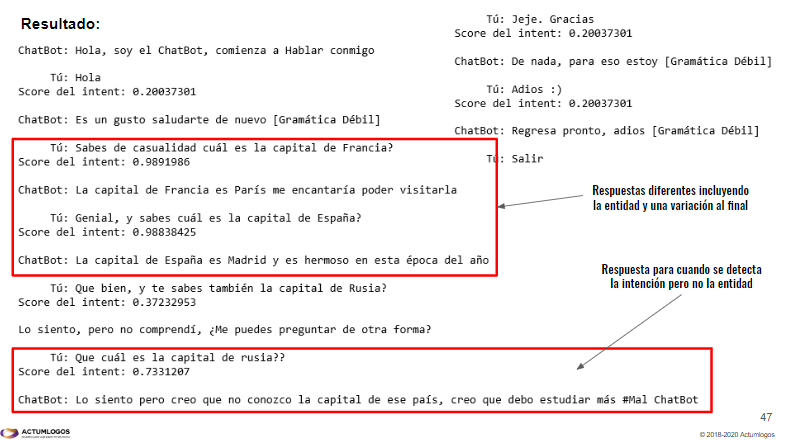

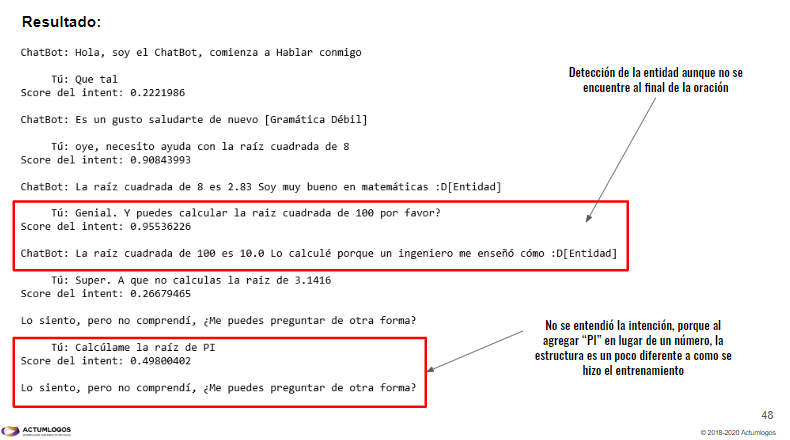